In [330]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


In [340]:
df = pd.read_csv('D:\excelR\Decision_Trees\Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [342]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [343]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [344]:
from sklearn.preprocessing import LabelEncoder
cols = ['ShelveLoc', 'Urban', 'US']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


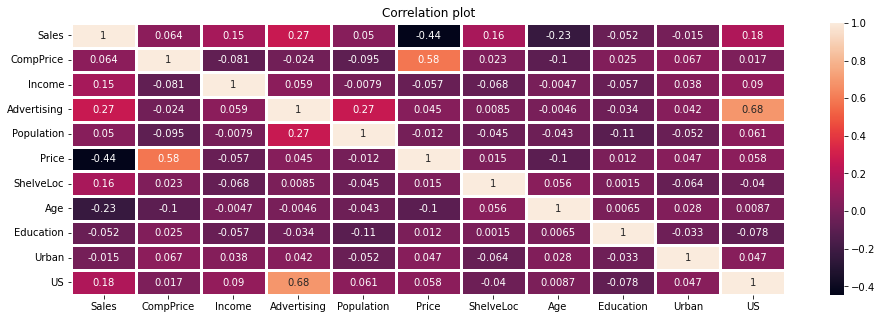

In [345]:
import seaborn as sns 
plt.figure(figsize = (16,5))
corr_plot = sns.heatmap(df.corr(),annot = True,linewidths=3)
plt.title("Correlation plot")
plt.show()

In [346]:
df['Saleslabels'] = pd.cut(x=df['Sales'], bins=[0,5,10, 20], labels=['Low', 'Average','High'], right=False)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Saleslabels
0,9.50,138,73,11,276,120,0,42,17,1,1,Average
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Average
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Average
397,7.41,162,26,12,368,159,2,40,18,1,1,Average
398,5.94,100,79,7,284,95,0,50,12,1,1,Average


# Model Validation

# Train-Test-Split

In [338]:
from sklearn.model_selection import train_test_split
y = df.pop("Saleslabels")
X = df.iloc[:,1:12]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (320, 10)
train size y :  (320,)
test size X :  (80, 10)
test size y :  (80,)


# GridSearch Cross-Validation

In [347]:
from sklearn.model_selection import GridSearchCV
y3 = df.pop("Saleslabels")
x3 = df.iloc[:,1:12]

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x3, y=y3)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.6325 {'max_depth': 17}


# Building Decision Tree Classifier using Entropy Criteria

In [88]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

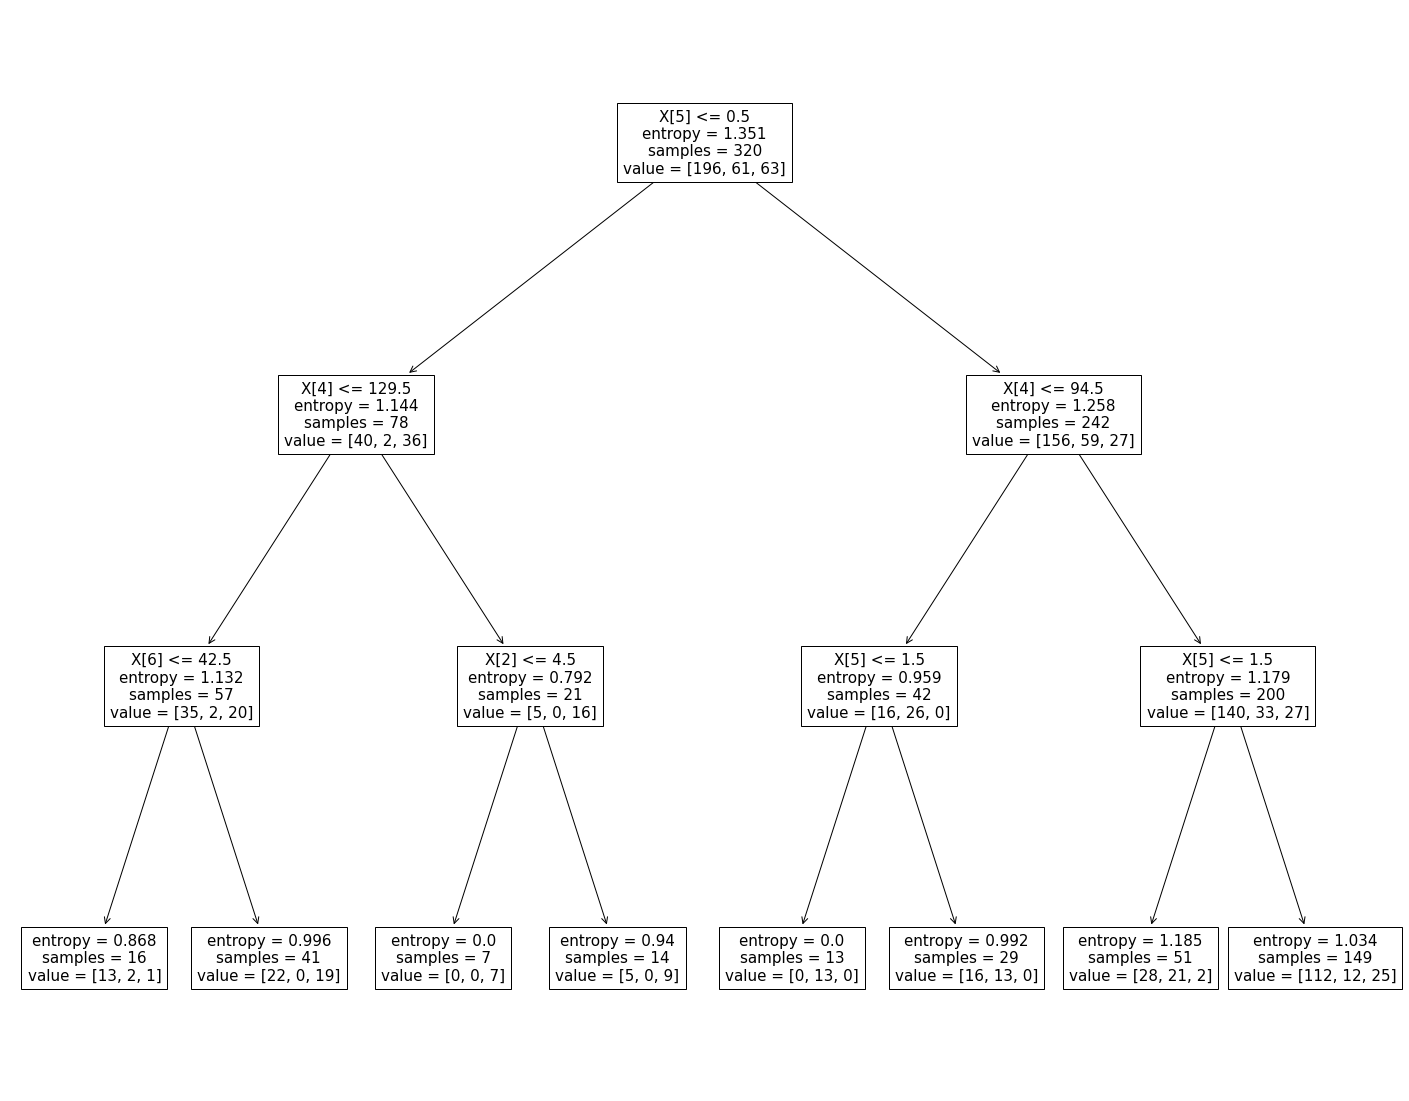

In [89]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model);

In [90]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Average    71
Low         5
High        4
dtype: int64

In [91]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Average,High,Low
Saleslabels,,,
Low,11,0,3
Average,46,0,2
High,14,4,0


In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy = accuracy_score(y_test,preds)
report = classification_report(y_test,preds)
cm = confusion_matrix(y_test,preds)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.6625
              precision    recall  f1-score   support

     Average       0.65      0.96      0.77        48
        High       1.00      0.22      0.36        18
         Low       0.60      0.21      0.32        14

    accuracy                           0.66        80
   macro avg       0.75      0.46      0.48        80
weighted avg       0.72      0.66      0.60        80

Confusion matrix:
[[46  0  2]
 [14  4  0]
 [11  0  3]]


# Building Decision Tree Classifier (CART) using Gini Criteria

In [93]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

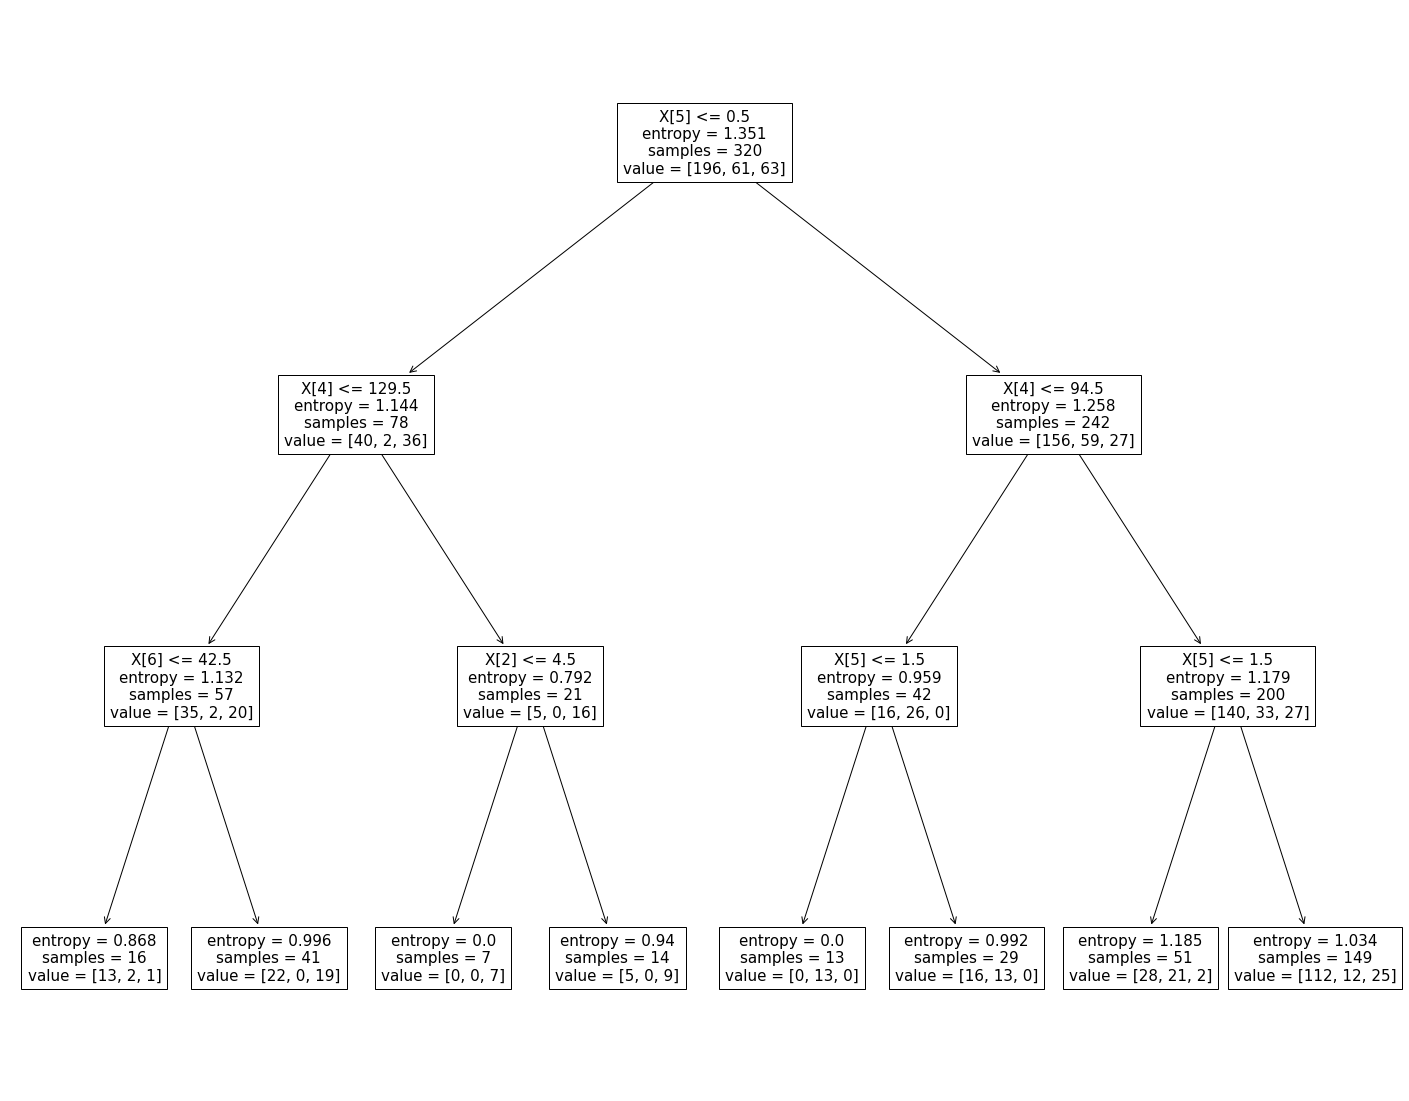

In [94]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model);

In [95]:
#Predicting on test data
preds2 = model2.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Average    71
Low         5
High        4
dtype: int64

In [96]:
pd.crosstab(preds2,y_test) # getting the 2 way table to understand the correct and wrong predictions

Saleslabels,Low,Average,High
row_0,,,
Average,11,44,12
High,0,2,6
Low,3,2,0


In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy = accuracy_score(y_test,preds2)
report = classification_report(y_test,preds2)
cm = confusion_matrix(y_test,preds2)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.6625
              precision    recall  f1-score   support

     Average       0.66      0.92      0.77        48
        High       0.75      0.33      0.46        18
         Low       0.60      0.21      0.32        14

    accuracy                           0.66        80
   macro avg       0.67      0.49      0.51        80
weighted avg       0.67      0.66      0.62        80

Confusion matrix:
[[44  2  2]
 [12  6  0]
 [11  0  3]]


# Building Decision Tree Regressor

# Feature Engineering for Decision Tree Regressor using ExtraTreesRegressor

Feature selection by ExtraTreesRegressor(model based). ExtraTreesRegressor helps us find the features which are most important.

In [249]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
df4 = df.iloc[:,0:12]
y1 = df4.pop("Sales")
X1 = df4.iloc[:,1:11]


X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state=10,train_size=0.8)

print("train size X : ",X1_train.shape)
print("train size y : ",y1_train.shape)
print("test size X : ",X1_test.shape)
print("test size y : ",y1_test.shape)

train size X :  (320, 9)
train size y :  (320,)
test size X :  (80, 9)
test size y :  (80,)


In [250]:
reg= ExtraTreesRegressor()

In [253]:
reg.fit(X1_train,y1_train)
reg.feature_importances_

array([0.06261117, 0.08167463, 0.04941776, 0.26832709, 0.31052717,
       0.11203049, 0.05525666, 0.0209227 , 0.03923234])

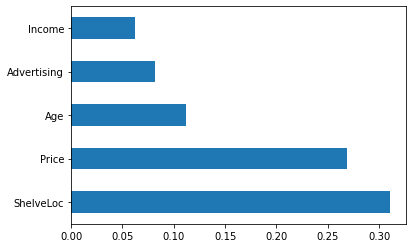

In [254]:
feat_importances = pd.Series(reg.feature_importances_, index=X1_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [284]:
# Building the DecisionTreeRegressor using the above selected features
df5 = df.loc[:, ["Sales","Income","Advertising","Age","Price","ShelveLoc"]]
df5

,Sales,Income,Advertising,Age,Price,ShelveLoc
0,9.50,73,11,42,120,0
1,11.22,48,16,65,83,1
2,10.06,35,10,59,80,2
3,7.40,100,4,55,97,2
4,4.15,64,3,38,128,0
...,...,...,...,...,...,...
395,12.57,108,17,33,128,1
396,6.14,23,3,55,120,2
397,7.41,26,12,40,159,2
398,5.94,79,7,50,95,0


# Normalizing Data

In [327]:
from sklearn.preprocessing import normalize
df_norm2= normalize(df5.iloc[:,0:7])
df_norm2=pd.DataFrame(df_norm2,columns=df5.columns)
df_norm2.head()

,Sales,Income,Advertising,Age,Price,ShelveLoc
0,0.064484,0.495508,0.074666,0.285087,0.814533,0.000000
1,0.095508,0.408590,0.136197,0.553299,0.706520,0.008512
2,0.094590,0.329089,0.094025,0.554750,0.752204,0.018805
3,0.049324,0.666537,0.026661,0.366595,0.646541,0.013331
4,0.028011,0.431977,0.020249,0.256486,0.863954,0.000000


# Model Validation using Train-Test-Split and GridSearch Cross Validation

In [286]:
#Train-Test-Split
y2 = df_norm2.pop("Sales")
X2 = df_norm2.iloc[:,1:7]

In [302]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state=80,train_size=0.8)

print("train size X : ",X2_train.shape)
print("train size y : ",y2_train.shape)
print("test size X : ",X2_test.shape)
print("test size y : ",y2_test.shape)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
df2=model.fit(X2_train, y2_train)

train size X :  (320, 4)
train size y :  (320,)
test size X :  (80, 4)
test size y :  (80,)


In [303]:
#Find the accuracy
df2.score(X2_test,y2_test)

0.34647800015163666

In [304]:
y_pred = df2.predict(X2_test)

In [305]:
df2=pd.DataFrame({'Actual':y2_test, 'Predicted':y_pred})
df2

,Actual,Predicted
203,0.011459,0.002880
136,0.035666,0.040650
397,0.044474,0.038551
346,0.053371,0.035626
81,0.046173,0.051069
...,...,...
89,0.055366,0.018392
115,0.060834,0.064296
37,0.038246,0.048045
249,0.033720,0.026442


In [291]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred)))

Mean Absolute Error: 7.473555006581618
Mean Squared Error: 62.27010511257225
Root Mean Squared Error: 7.891140925910033


Text(0.5, 0, 'Actuals')

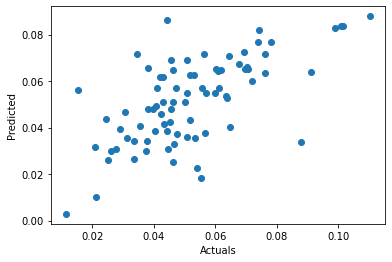

In [306]:
plt.scatter(x=df2['Actual'], y=df2['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')

In [328]:
#GridSearch Cross Validation
y4 = df_norm2.pop("Sales")
x4 = df_norm2.iloc[:,1:7]

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=x4, y=y4)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.3139807551974367 {'max_depth': 4}
